In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

vocab_size = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:

word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("\nSample Decoded Review:\n", decoded_review)
print(f"Label (0 = Negative, 1 = Positive): {y_train[0]}")

# Pad sequences to same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"\nShape after padding => X_train: {X_train.shape}, X_test: {X_test.shape}")



Sample Decoded Review:
 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what the

In [4]:
model = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\tejpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.5790 - loss: 0.6486 - precision: 0.5743 - recall: 0.6735 - val_accuracy: 0.8494 - val_loss: 0.3410 - val_precision: 0.8471 - val_recall: 0.8481
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9168 - loss: 0.2225 - precision: 0.9192 - recall: 0.9167 - val_accuracy: 0.8436 - val_loss: 0.3802 - val_precision: 0.8149 - val_recall: 0.8842
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9883 - loss: 0.0445 - precision: 0.9876 - recall: 0.9892 - val_accuracy: 0.8418 - val_loss: 0.6441 - val_precision: 0.8145 - val_recall: 0.8801
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9946 - loss: 0.0176 - precision: 0.9940 - recall: 0.9953 - val_accuracy: 0.8456 - val_loss: 0.8368 - val_precision: 0.8678 - val_recall: 0.8109
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.9971 - loss: 0.0097 - precision: 0.9976 - recall: 0.9966 - val_accuracy: 0.8424 - va

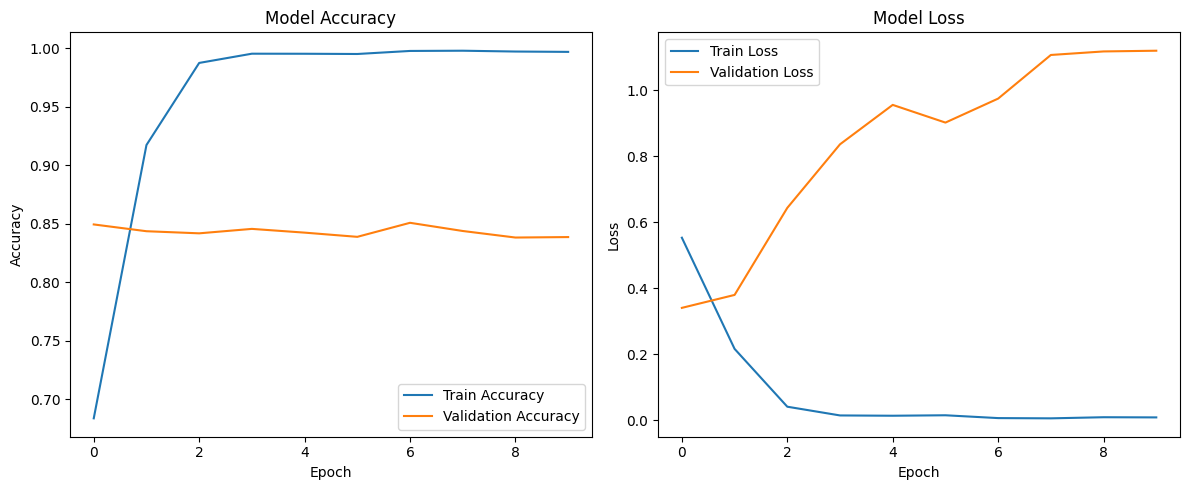

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()


Test Accuracy: 0.8388
Test Precision: 0.8246
Test Recall: 0.8607



Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.82      0.84     12500
    Positive       0.82      0.86      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



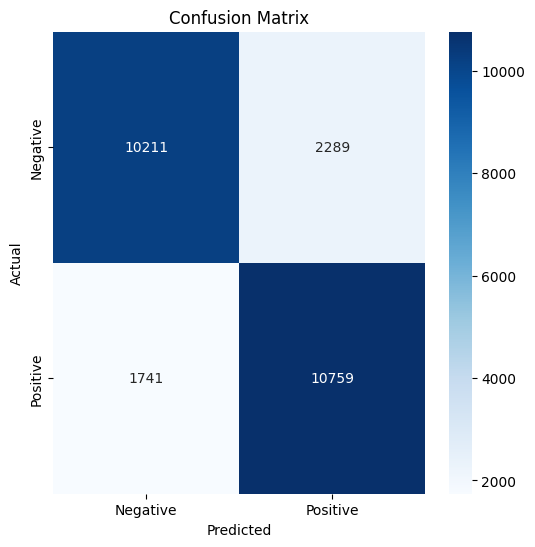

In [9]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAdditional Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Additional Evaluation Metrics:
Accuracy: 0.8388
Precision: 0.8246
Recall: 0.8607
F1 Score: 0.8423


In [11]:
def predict_sentiment(text):
    words = text.lower().split()
    tokens = [word_index.get(word, 2) for word in words if word_index.get(word, 0) < vocab_size]
    padded_tokens = pad_sequences([tokens], maxlen=maxlen)
    
    prediction = model.predict(padded_tokens)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"\nReview: {text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {prediction:.4f})")


In [13]:
sample_reviews = [
    "This movie was fantastic! I really loved the acting and the plot was amazing.",
]

for review in sample_reviews:
    predict_sentiment(review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step

Review: This movie was fantastic! I really loved the acting and the plot was amazing.
Predicted Sentiment: Positive (Confidence: 0.9999)
